# Lesson 4 Assignment - Autodetection of Breast Cancer

## Author - Studentname

### Background
The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Breast Cancer Wisconsin (Diagnostic) Data set</a> contains donated data.
These data were obtained from the University of Wisconsin Hospitals, Madison. Donors:
1. Dr. William H. Wolberg, General Surgery Dept.
2. W. Nick Street, Computer Sciences Dept.
3. Olvi L. Mangasarian, Computer Sciences Dept.

They contain the simplified and normalized attributes used to detect breast cancer. Your task is to build
a decision tree classifier that would be able to detect, based on the attributes below, whether a tumor is
benign or malignant.

Attributes:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitosis
11. Class (4 for malignant, 2 for benign)




## Tasks
Using the provided WI_Breast_Cancer.csv file, build an experiment using a decision tree.

Answer the following questions:
1. Test both entropy and the gini coefficient. Which performs better and why?
2. What are the best hyperparameter settings for both?
3. Visualize both models and see which feature is selected for each criterion. Are they same for
both? Why or why not?
4. Determine the AUC for the best model you can achieve. What are the precision and recal values
and which might be the one you want to maximize?
5. What are the implications of using this type of machine learning algorithm for breast cancer
analysis?


In [32]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WI_Breast_Cancer.csv"
colnames = ['Sample_code' , 'Class', 'Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 
             'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']

In [33]:
# Import libraries
import pandas as pd 
cancer_data = pd.read_csv(URL, names = colnames, header = None)
print(cancer_data.head())
print(cancer_data.info())
print(cancer_data.describe())

  Sample_code Class  Clump_thick  Uni_cell_sz  Uni_cell_shp  Marg_adhes  \
0     1000025     2          5.0          1.0           1.0         1.0   
1     1002945     2          5.0          4.0           4.0         5.0   
2     1015425     2          3.0          1.0           1.0         1.0   
3     1016277     2          6.0          8.0           8.0         1.0   
4     1017023     2          4.0          1.0           1.0         3.0   

   Single_cell_sz  Bare_Nucl  Bland_Chr  Norm_Nucl Mitosis  
0             2.0        1.0        3.0        1.0       1  
1             7.0       10.0        3.0        2.0       1  
2             2.0        2.0        3.0        1.0       1  
3             3.0        4.0        3.0        7.0       1  
4             2.0        1.0        3.0        1.0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 11 columns):
Sample_code       709 non-null object
Class             702 non-null object
Cl

## Drop sample code
### Drop NA
### Convert Mitosis to integer

In [34]:
cancer_data = cancer_data.dropna() 
results = cancer_data['Class'].astype(str).astype(int)
cancer_data = cancer_data.drop(['Class','Sample_code'], axis = 1)
print(cancer_data.describe())
print(cancer_data['Mitosis'].value_counts())

       Clump_thick  Uni_cell_sz  Uni_cell_shp  Marg_adhes  Single_cell_sz  \
count   701.000000   701.000000     701.00000  701.000000      701.000000   
mean      4.433666     3.154066       3.21826    2.813124        3.226819   
std       2.827459     3.069053       2.97456    2.858201        2.220340   
min       1.000000     1.000000       1.00000    1.000000        1.000000   
25%       2.000000     1.000000       1.00000    1.000000        2.000000   
50%       4.000000     1.000000       1.00000    1.000000        2.000000   
75%       6.000000     5.000000       5.00000    4.000000        4.000000   
max      10.000000    10.000000      10.00000   10.000000       10.000000   

        Bare_Nucl   Bland_Chr   Norm_Nucl  
count  701.000000  701.000000  701.000000  
mean     3.456491    3.447932    2.877318  
std      3.637881    2.447550    3.061150  
min      0.000000    1.000000    1.000000  
25%      1.000000    2.000000    1.000000  
50%      1.000000    3.000000    1.000000 

## Change weird Mitosis input to a 3
Seems the most reasonable thing to do

In [49]:

##s = cancer_data.loc[(cancer_data['Mitosis'] == "3) <-----Reappears in Group 8 as:")]
##print(s.value_counts())
cancer_data['Mitosis'] = cancer_data['Mitosis'].replace( to_replace= ['r'], value = 3, regex=True)
##cancer_data = cancer_data['Mitosis'].astype(str).astype(int)
print(cancer_data['Mitosis'].value_counts()) 
results = results.map({2 : 0, 4 : 1})
print(results.value_counts())

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
3       1
3       1
Name: Mitosis, dtype: int64
0    458
1    243
Name: Class, dtype: int64


## Now run both types of decision trees

In [71]:
from sklearn.model_selection import train_test_split
# Ensure the decision tree is deterministic
import numpy as np
np.random.seed(101)

## split into test and training sets

X_train, X_test, y_train, y_test = train_test_split(cancer_data, results, test_size = 0.25, random_state=1)


from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 2
model_gini = DecisionTreeClassifier(min_samples_leaf=2).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time. 

## generate the accuracy scores

In [72]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
misclassified_ent_points = (y_test != y_ent_pred).sum()
misclassified_gini_points = (y_test != y_gini_pred).sum()
print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))
print("Variables are\n", list(X_train))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
print("entropy false positive rate:", fpr)
print("entropy true positive rate:", tpr)
print("Entropy AUC = %.3f"%(auc(fpr, tpr)))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Gini Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_gini_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
print("Gini false positive rate", fpr)
print("Gini true positive rate:", tpr)
print("Gini AUC = %.3f"%(auc(fpr, tpr)))

Entropy accuracy is : 96.02272727272727%
Gini accuracy is : 93.18181818181817%
Variables are
 ['Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']
Number of mislabeled Entropy points out of a total 176 points : 7
Entropy Accuracy = 96.02
entropy false positive rate: [0.         0.02542373 1.        ]
entropy true positive rate: [0.         0.93103448 1.        ]
Entropy AUC = 0.953
Number of mislabeled Entropy points out of a total 176 points : 7
Gini Accuracy = 93.18
Gini false positive rate [0.         0.03389831 1.        ]
Gini true positive rate: [0.         0.86206897 1.        ]
Gini AUC = 0.914


## Let's look at the confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix
print("gini confusion matrix\n")
pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted benign', 'Predicted malignant'],
    index=['True benign', 'True malignant']
)

gini confusion matrix



,Predicted benign,Predicted malignant
True benign,114,4
True malignant,8,50


In [74]:
print("entropy confusion matrix\n")
pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted benign', 'Predicted malignant'],
    index=['True benign', 'True malignant']
)

entropy confusion matrix



,Predicted benign,Predicted malignant
True benign,115,3
True malignant,4,54


In [75]:
# Ensure the decision tree is deterministic
import numpy as np
np.random.seed(101)

In [79]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

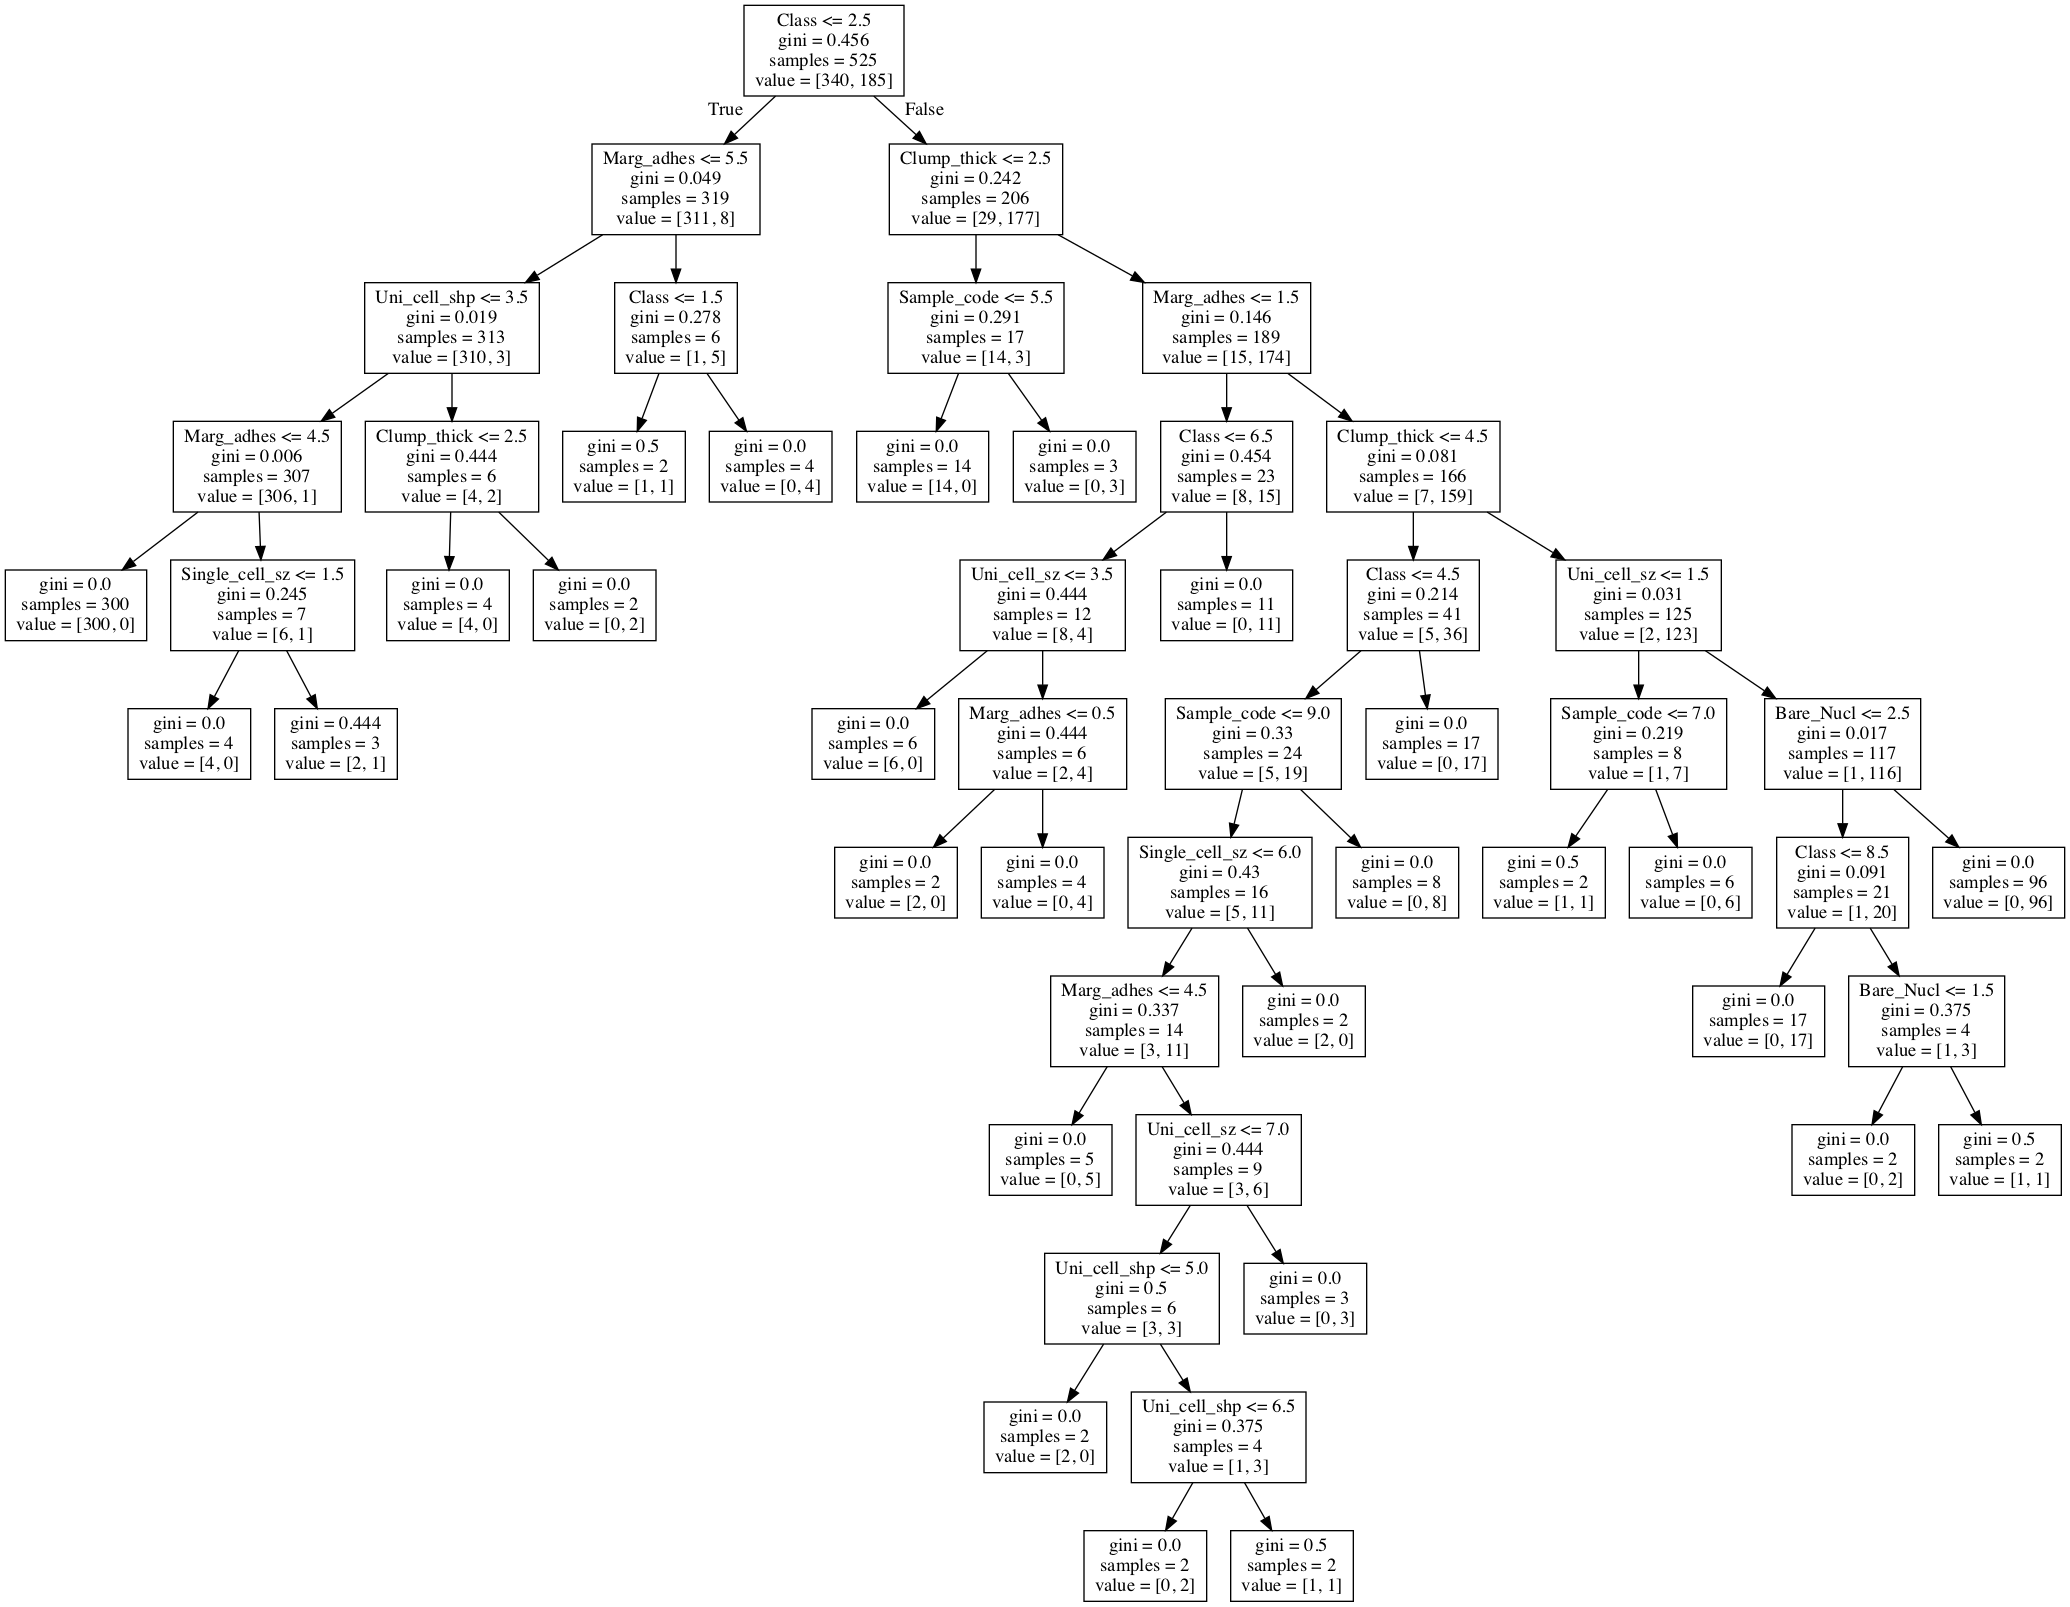

In [80]:
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

In [81]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

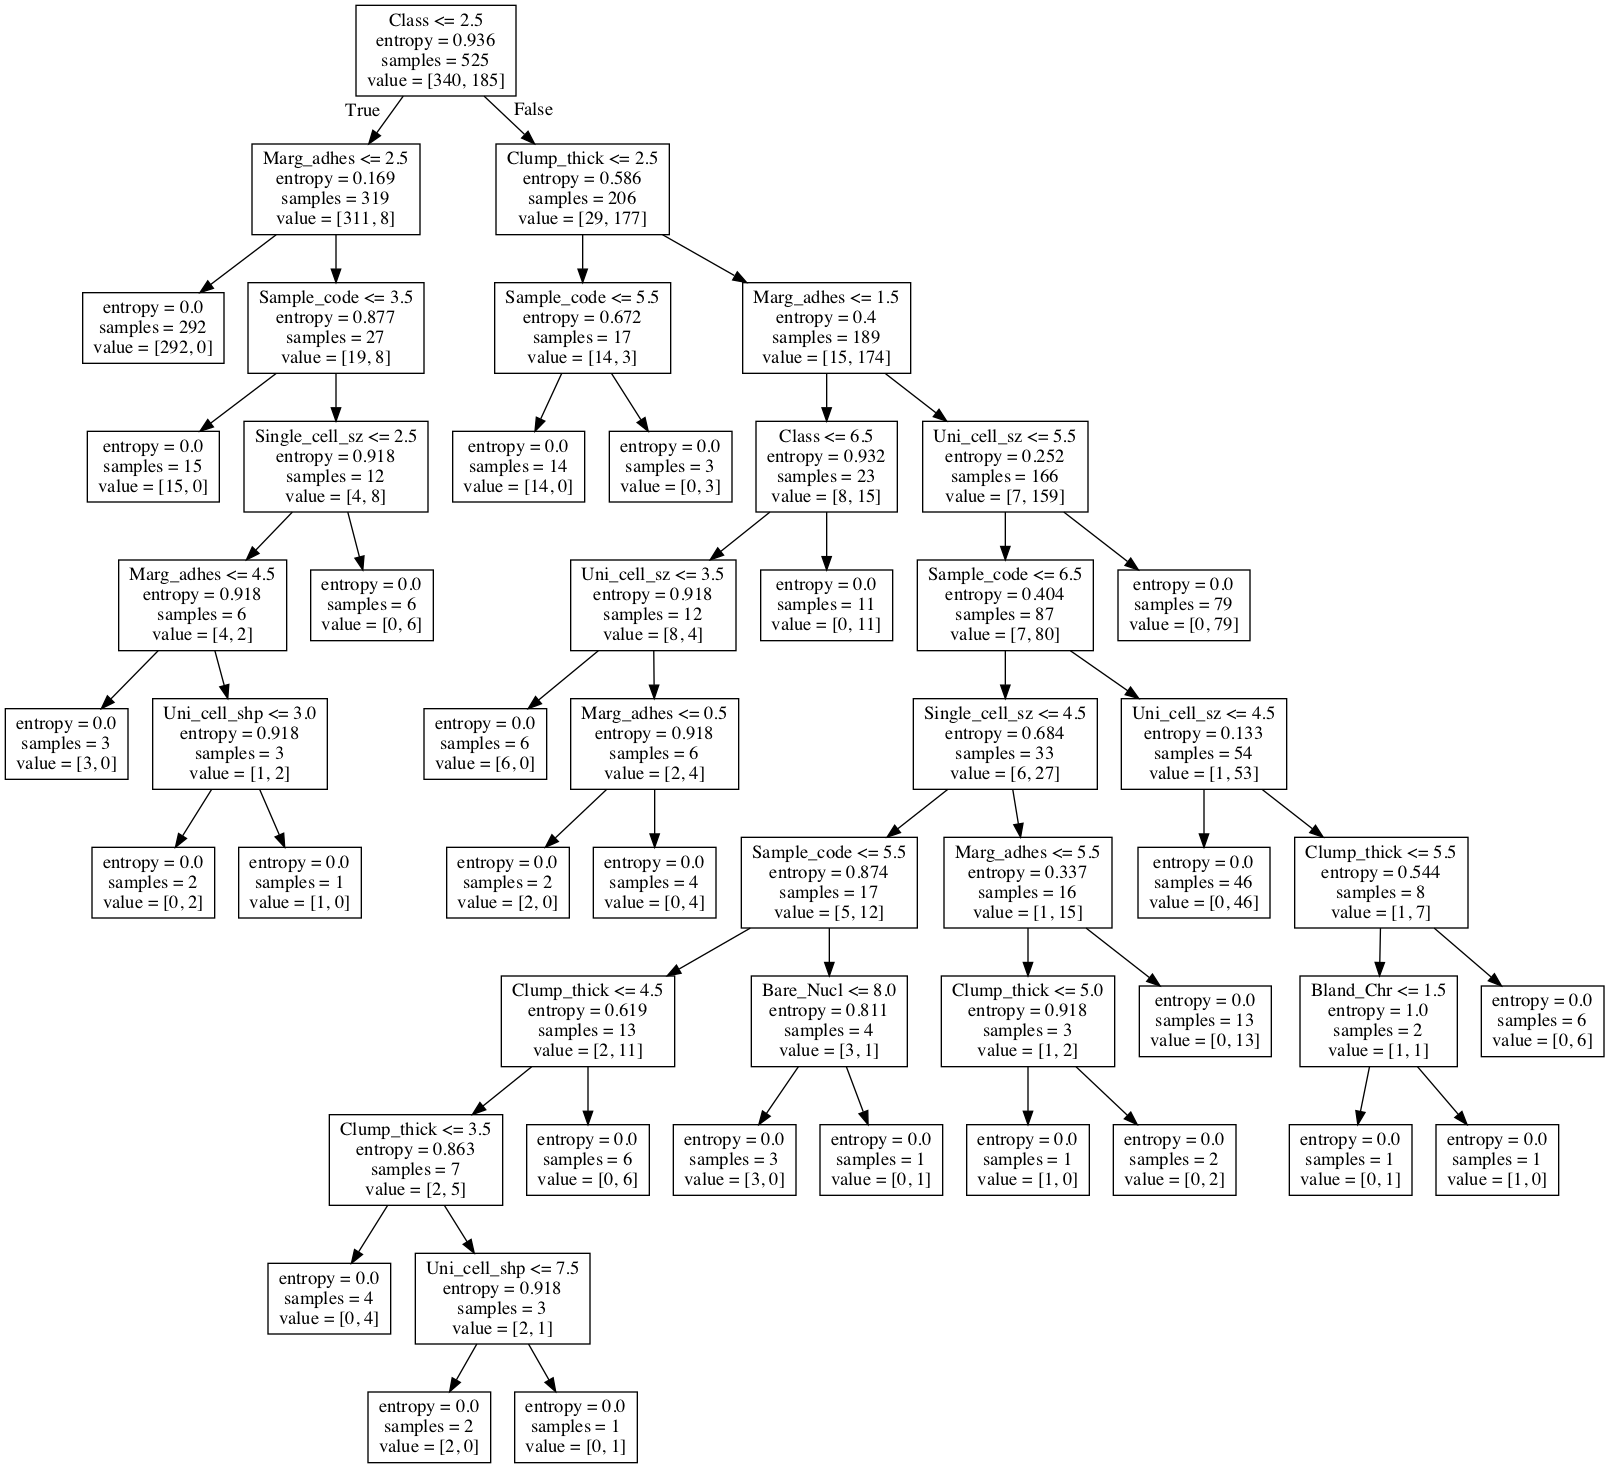

In [82]:
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 